PEC2: Actividad y Debate

Machine Learning

Demetrio Muñoz Alvarez

In [ ]:
# Cargamos e instalamos las librerías necesarias para realizar la actividad:
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras import layers, models
# Se eliminan los outputs para no sobrecargar el informe. 

# Cargar los datos (data3.csv y clase3.csv).

In [4]:
file_data = 'data3.csv' # Establecemos la ruta  de los archivos a  importar. 
file_class = 'class3.csv'
data3 = pd.read_csv(file_data) #  Impotamos los  conjuntos de datos usando la librería "Pandas"
class3 = pd.read_csv(file_class)
class3 = class3.rename(columns = {'x': 'Class'})  # Renombramos la columna 'x' del conjunto de datos "class3" a 'Class' para una mayorcom prension. 
class3['Class'] = class3['Class'] - 1 # Restamos 1 a cada valor en la columna 'Class', transformándolos de '1 a 8' a '0 a 7'. Este paso lo realizamos para procesos posteriores.

# Realizar un estudio exploratorio de los datos con gráficos y tablas.

Número de clases en 'class3':
[0, 1, 2, 3, 4, 5, 6, 7]
Data3:
  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  pCASP9_N   PSD95_N    SNCA_N  \
0  0.177565   2.373744  0.232224  ...  1.603310  2.014875  0.108234   
1  0.172817   2.292150  0.226972  ...  1.671738  2.004605  0.109749   
2  0.175722   2.283337  0.230247  ...  1.663550  2.016831  0.108196   
3  0.176463   2.152301  0.207004  ...  1.484624  1.957233  0.119883   
4  0.173627   2.134014  0.192158  ...  1.534835  2.009109  0.119524   

   Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N 

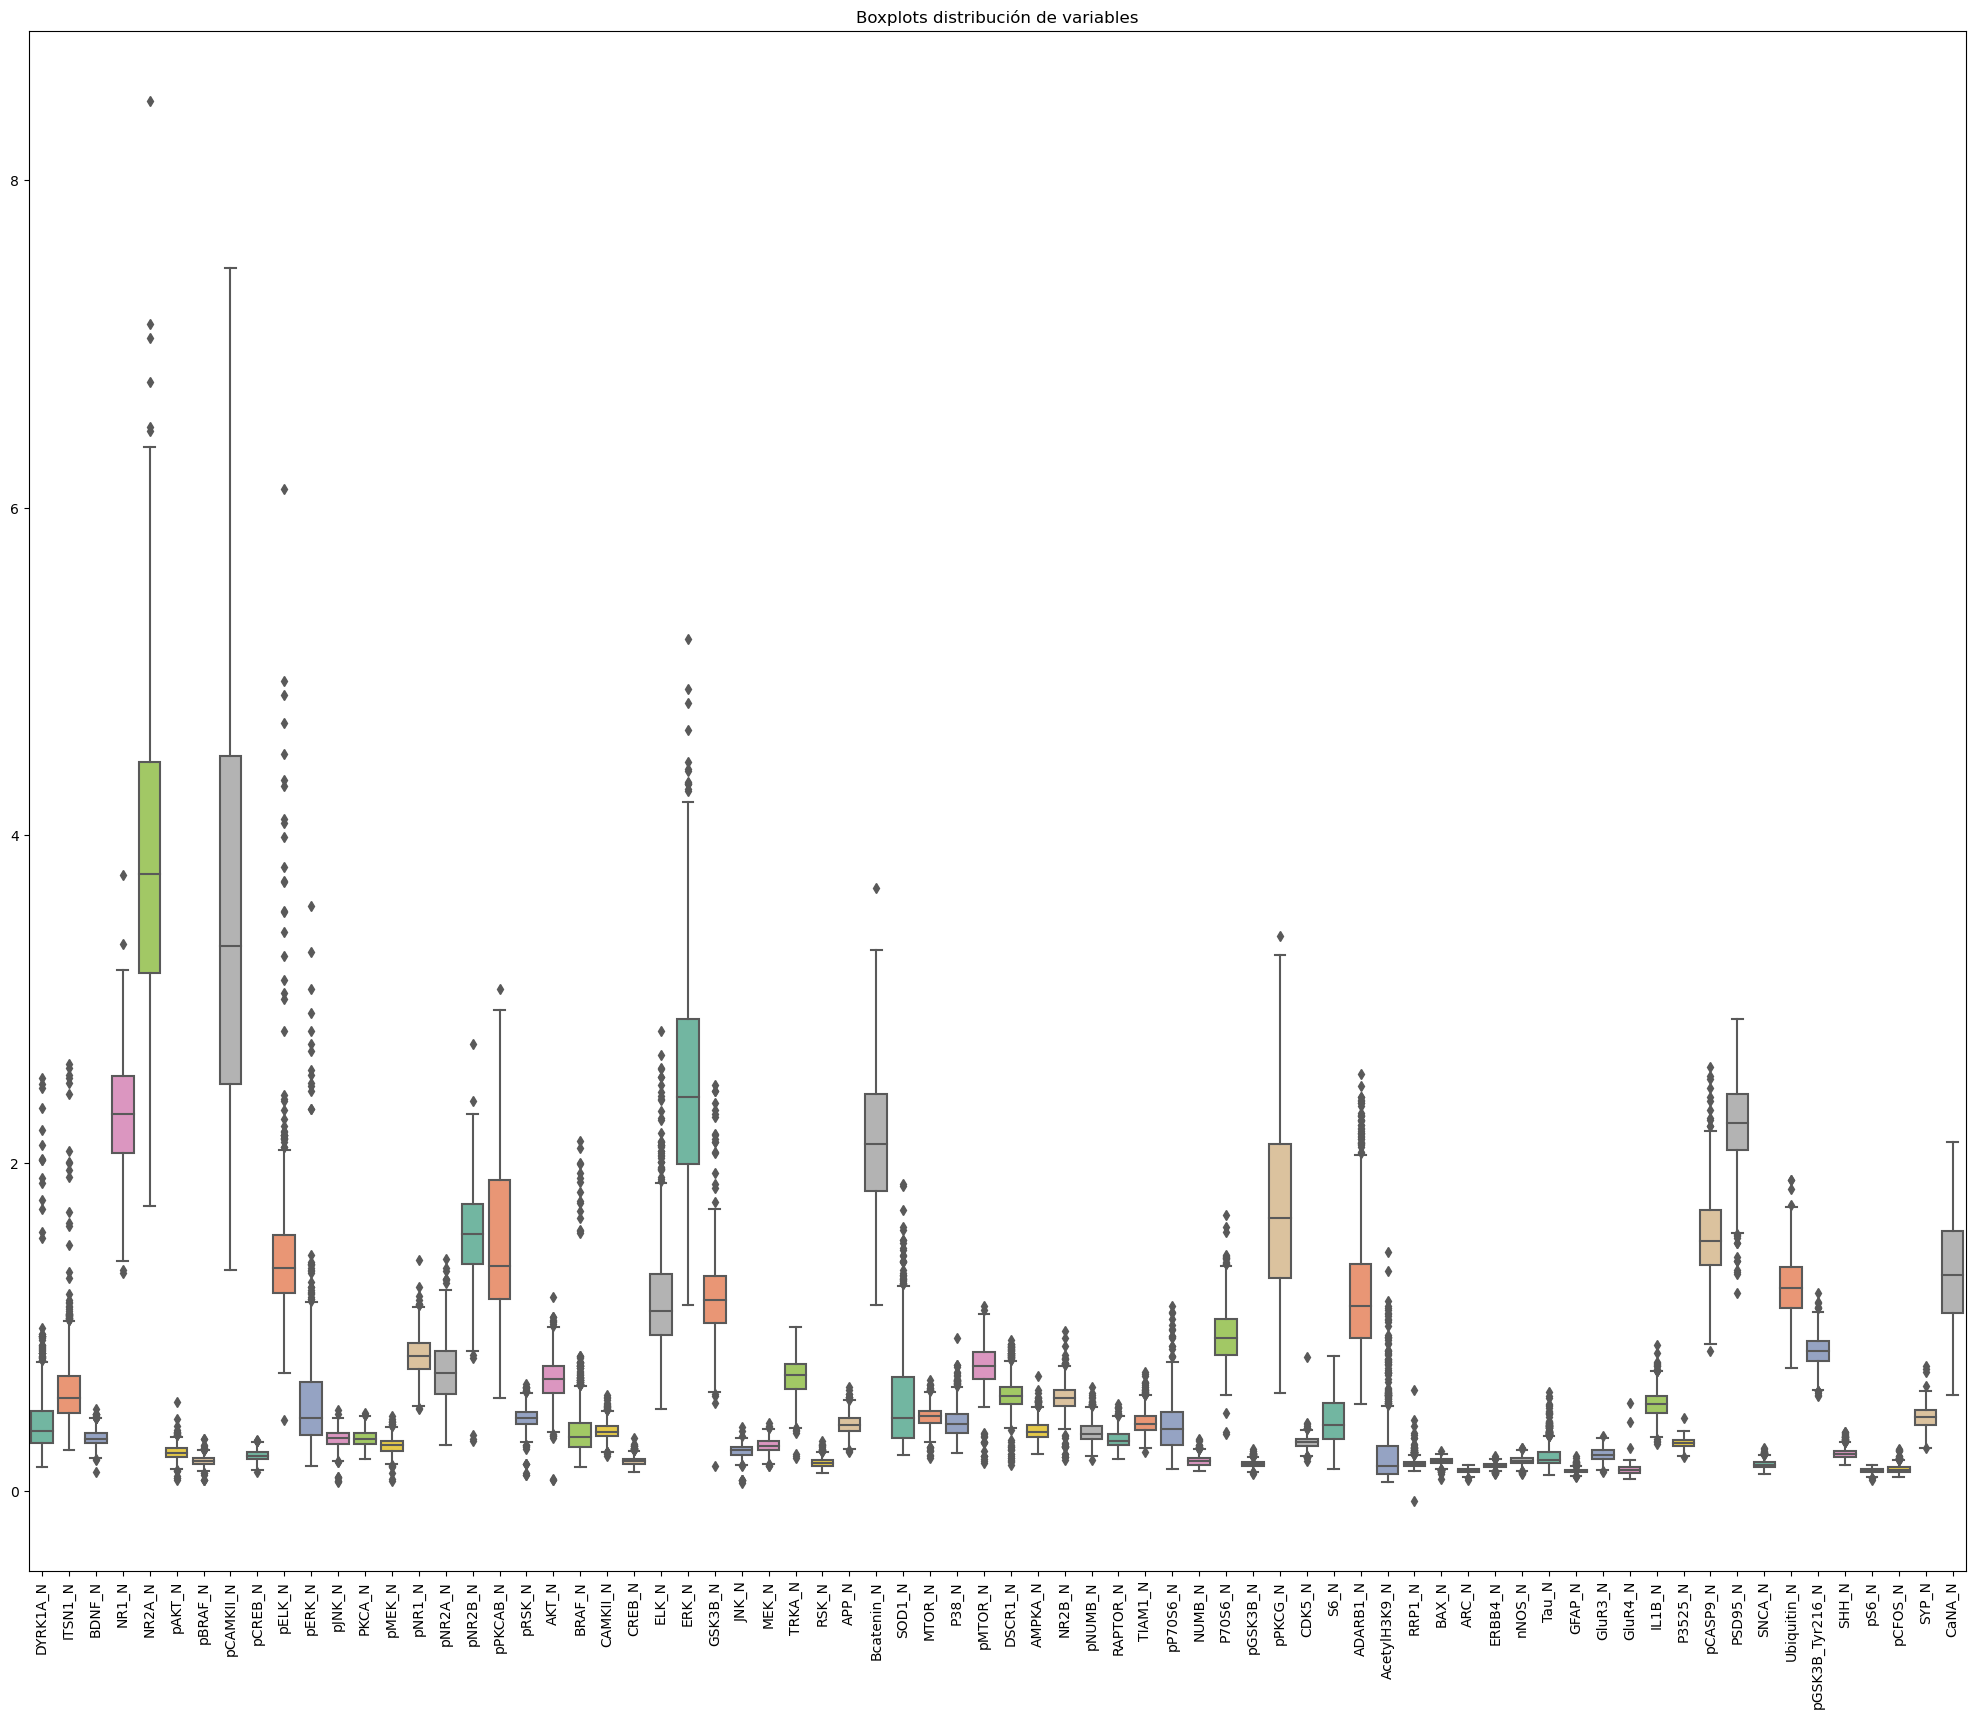

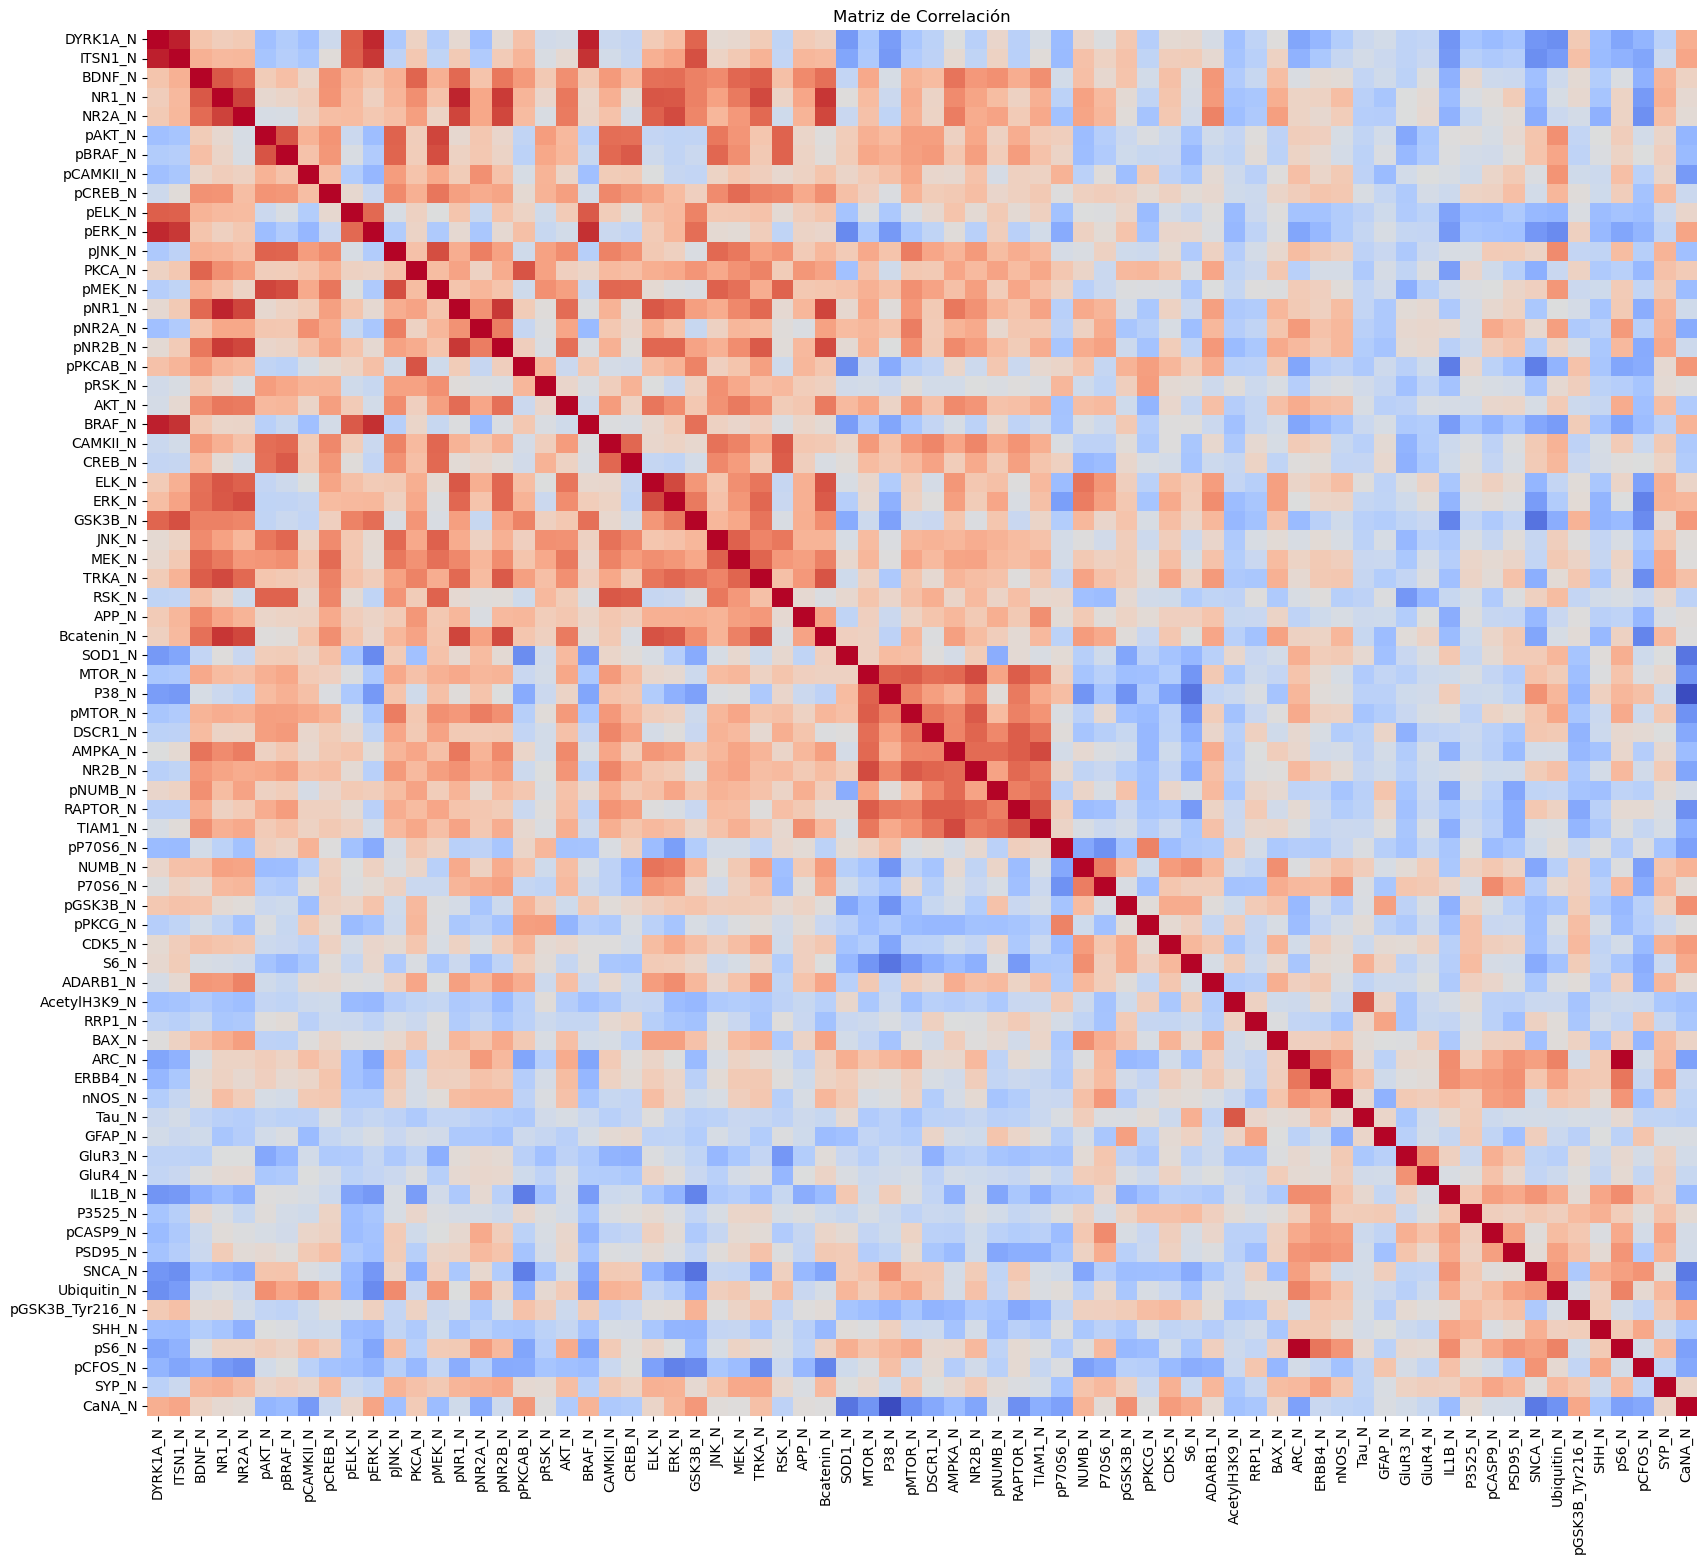

In [6]:
# Para este apartado realizamos un analisis exploratorio de los datos del conjunto de datos 'data3' y 'class3':

# El conjunto de datos 'class3' solo encontramos el tipo de grupo o clase para la clasificación, tenemos 8 clases, categorizadas de 1 a 8.
print("Número de clases en 'class3':")
print(sorted(class3['Class'].unique())) # Para no tener problemas a la hora de implementar los modelos, hemos restamos una unidad a los valores de las clases, es decir, la clase 0 de nuestros datos corresponde a la clase 1 del enunciado de la PEC, así respectivamente con las demás clases:
# Mostramos las primeras entradas del conjunto de datos 'data3':
print("Data3:")
print(data3.head())
# Obtenemos un summary de las variables del conjunto de 'datos3':
print("\nData3 Summary:") 
print(data3.describe())

# Exploramos si tenemos algún valor NA:
total_na = sum(data3.iloc[:, 1:].isnull().sum())
print(f"Número total de valores nulos: {total_na}") # No se encuentran valores nulos en el conjunto de datos de las variables. 

# Valores atípicos de las variable:
data3_outliders = data3.drop('MouseID', axis=1)
# Calcular el rango intercuartílico (IQR) para cada columna
Q1 = data3_outliders.quantile(0.25)
Q3 = data3_outliders.quantile(0.75)
IQR = Q3 - Q1
# Identificamos los valores atípicos usando el 'IQR':
outliers = ((data3_outliders < (Q1 - 1.5 * IQR)) | (data3_outliders > (Q3 + 1.5 * IQR)))
total_outliers = outliers.sum().sum()
# Mostramos los valores atípicos
print(f'Número total de valores atípicos: {total_outliers}')
# Boxplot de la distribución:
plt.figure(figsize = (25, 20))
sns.boxplot(data = data3_outliders, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Boxplots distribución de variables')
plt.show()

# Matriz de correlación:
data3_corr = data3.drop('MouseID', axis=1) # Exluimos 'MouseID' de la correalción.
correlation_mtr = data3_corr.corr()
# Heatmap:
plt.figure(figsize = (20, 18))
sns.heatmap(correlation_mtr, cmap = 'coolwarm', cbar = False)
plt.title('Matriz de Correlación')
plt.show()

Nuestros datos de estudio presentan dos conjuntos de datos. Uno muestra los valores de 8 clases ('class3') distintas con 1080 muestras, las cuales hemos numerado del 0 al 7. Esto difiere en una unidad menos de las clases presentadas en el enunciado de la PEC2 para evitar problemas en pasos relacionados con el entrenamiento de la red neuronal. Las 8 clases son:

| Código PEC2 | Descripción                                       | Código Ejercicio |
|-------------|---------------------------------------------------|------------------|
| 1           | c-CS-s: control-context-shock-salino             | 0                |
| 2           | c-CS-m: control-context-shock-memantina          | 1                |
| 3           | c-SC-s: control-shock-context-salino             | 2                |
| 4           | c-SC-m: control-shock-context-memantina          | 3                |
| 5           | t-CS-s: trisómico-context-shock-salino           | 4                |
| 6           | t-CS-m: trisómico-context-shock-memantina        | 5                |
| 7           | t-SC-s: trisómico-shock-context-salino           | 6                |
| 8           | t-SC-m: trisómico-shock-context-memantina        | 7                |

El otro conjunto de datos ('data3') muestra las mediciones de los niveles de expresión de proteínas/modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza. Tenemos 72 variables y 1080 muestras de estudio. Este conjunto de datos no presenta valores faltantes o 'Na', pero observamos valores atípicos en sus mediciones, con un total de 1411 valores que se desvían. Para nuestro modelo, vamos a mantener estos valores, ya que pueden ser representativos del caso de estudio que estamos tratando. Aun así, en el siguiente paso, y debido a la naturaleza de los datos, se va a realizar una normalización de los mismos; esto no elimina los valores atípicos, pero puede mitigar su efecto.

Por último, las figuras presentadas muestran la distribución de las variables y cuáles de ellas presentan valores atípicos. También se presenta una matriz de correlación para ver las relaciones que tienen unas variables con otras.

# Normalizar las expresiones con la transformación minmax.

In [9]:
data3.drop('MouseID', axis = 1, inplace = True) # Eliminamos la columna "MouseID", ya que no es necesaria para implementar el modelo.

norm = MinMaxScaler() # Establecemos la función MinMax.
data3_norm = pd.DataFrame(norm.fit_transform(data3), columns=data3.columns) # Normalizamos los datos del conjunto "data3". Usamos la función "MinMaxScaler" de la librería "sklearn.preprocessing". Con esto, todas las variables están en un rango de valor de 0 a 1. 

data_model_1 = pd.concat([class3, data3_norm], axis=1) # Combinamos ambos conjuntos de datos para preparar los conjuntos de entrenemiento/prueba.
display(data_model_1.head()) # Comprobamos las primeras entradas del nuevo conjunto para revisar la normalización y las clases. 

,Class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,1,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,...,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.426816,0.133930,0.336299,0.705738
1,1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,...,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.429952,0.110434,0.365208,0.749771
2,1,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,...,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.448652,0.121560,0.353621,0.868229
3,1,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,...,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.392700,0.151031,0.265619,0.721879
4,1,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,...,0.393332,0.480334,0.116965,0.215528,0.480342,0.245702,0.410187,0.147711,0.350381,0.812053


# Separar los datos en train (2/3) y test (1/3).

In [11]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

X = data_model_1.drop('Class', axis = 1) # Conjunto que contiene todas las variables de interés para el modelo. 
y = data_model_1['Class'] # Preparamos las etiquetas del modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) # Dividimos los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento "X_train, y_train" contiene el 2/3 de los datos, mientras que el conjunto de prueba "X_test, y_test" contiene el 1/3.

# Mostramos el número de muestras de la separación:
print("Número de muestras de X_train:"  + str(len(X_train))) 
print("Número de muestras de X_test:"  + str(len(X_test)))

Número de muestras de X_train:720
Número de muestras de X_test:360


# Definir el modelo 1, que consiste en una red neuronal con una capa oculta densa de 35 nodos, con activación relu. Añadir un 20% de dropout. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa.

In [13]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)  

# Definimos el modelo de red neuronal usando la biblioteca "Keras":
model_1 = models.Sequential() # Creamos un modelo secuencial en "Keras" para preparar una arquitectura de red neuronal aplicando capas de forma secuencial.
model_1.add(layers.Dense(35, activation = 'relu', input_shape = (X_train.shape[1],))) # Agregamos una capa densa al modelo con 35 nodos. Establecemos la activacion 'relu' para introducir no linealidades en el modelo.
model_1.add(layers.Dropout(0.2)) # Agregamos una capa de Dropout desactivando aleatoriamente el 20% de las neuronas en cada paso de entrenamiento para prevenir el sobreajuste.
model_1.add(layers.Dense(8, activation = 'softmax')) # Para la capa de salida, establecemos la función de activación 'softmax' y una capa densa con 8 salidas, correspondientes a las clases iniciales. 
model_1.summary() # Mostramos el resumen del modelo. Incluye información sobre la arquitectura de la red neuronal, el número de parámetros entrenables en cada capa, y el número total de parámetros en el modelo.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                2555      
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 288       
                                                                 
Total params: 2843 (11.11 KB)
Trainable params: 2843 (11.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


El resumen ('summary') del modelo 'model_1' nos muestra que tenemos un total de 2843 parámetros entrenables. La arquitectura del modelo presenta dos capas densas y una capa de 'Dropout'. El número total de parámetros se puede justificar de la siguiente forma:

- De la primera capa 'dense (Dense)', tenemos 35 nodos de salida conectados a cada variable ((X_train.shape[1],)=72), más 35 sesgos. Es igual a: 35 nodos × (X_train.shape[1],) = 72 + 35 = 2555 parámetros.
- De la capa 'dropout (Dropout)', no tenemos parámetros entrenables, lo que da como resultado 0 parámetros.
- De la última capa 'dense_1 (Dense)', obtenemos 8 nodos de salida (clases), el número de nodos de la capa anterior es 35, más 8 sesgos. Igual a 288 parámetros entrenables.

# Ajustar el modelo 1 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 50 épocas.

Epoch 1/50
18/18 - 4s - loss: 2.1507 - accuracy: 0.0920 - val_loss: 2.0907 - val_accuracy: 0.1458 - 4s/epoch - 204ms/step
Epoch 2/50
18/18 - 0s - loss: 2.0921 - accuracy: 0.1267 - val_loss: 2.0600 - val_accuracy: 0.1736 - 305ms/epoch - 17ms/step
Epoch 3/50
18/18 - 0s - loss: 2.0381 - accuracy: 0.1771 - val_loss: 2.0370 - val_accuracy: 0.1597 - 288ms/epoch - 16ms/step
Epoch 4/50
18/18 - 0s - loss: 2.0050 - accuracy: 0.1719 - val_loss: 2.0086 - val_accuracy: 0.2014 - 295ms/epoch - 16ms/step
Epoch 5/50
18/18 - 0s - loss: 1.9818 - accuracy: 0.2153 - val_loss: 1.9878 - val_accuracy: 0.1806 - 292ms/epoch - 16ms/step
Epoch 6/50
18/18 - 0s - loss: 1.9410 - accuracy: 0.1997 - val_loss: 1.9542 - val_accuracy: 0.2083 - 206ms/epoch - 11ms/step
Epoch 7/50
18/18 - 0s - loss: 1.9010 - accuracy: 0.2639 - val_loss: 1.9233 - val_accuracy: 0.2569 - 209ms/epoch - 12ms/step
Epoch 8/50
18/18 - 0s - loss: 1.8647 - accuracy: 0.2882 - val_loss: 1.8935 - val_accuracy: 0.2917 - 283ms/epoch - 16ms/step
Epoch 9/50

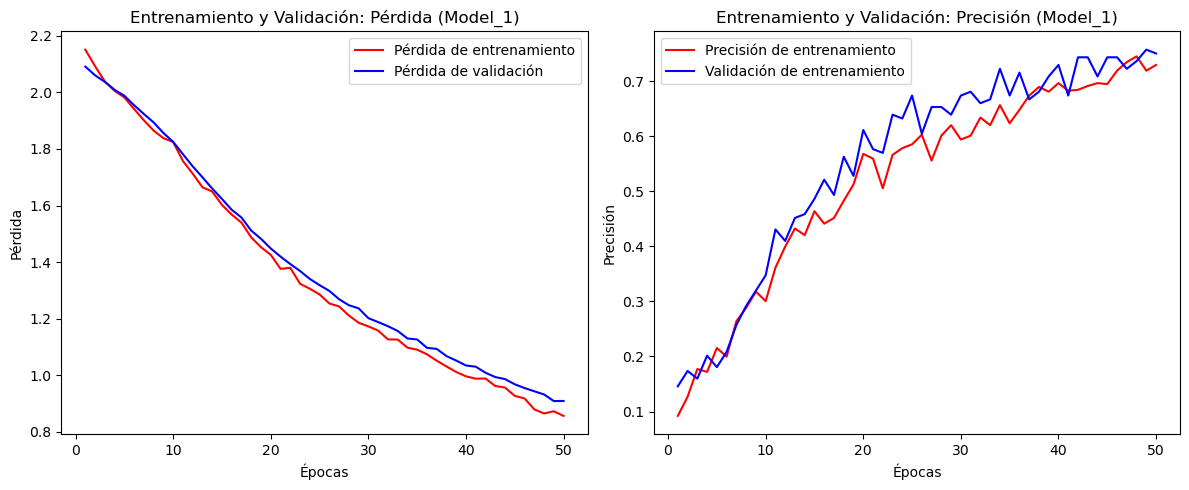

In [16]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123) 

# Compilamos el model_1:
model_1.compile(optimizer = 'adam', # Establecemos el optimizador 'adam' de forma predeterminada. 
                loss = 'sparse_categorical_crossentropy', # Al manejar etiquetas con valores enteros usamos 'sparse_categorical_crossentropy' como fúncion de perdida. 
                metrics = ['accuracy'] # Usamos 'accuracy' como metrica para evaluar el rendimiento del modelo durante el entrenamiento. 
)

# Entrenamos el model_1 y almacenamos la informacion en la variable "history": 
history = model_1.fit(
    X_train, y_train,
    epochs = 50, # Establecemos las épocas de interacciones del entrenamiento a '50'.
    validation_split = 0.2,  # 20% de los datos se usarán como datos de validación. 
    verbose = 2 # Nivel de detalle durante el entrenamiento. 
)

# Curvas de aprendizaje de entrenamiento y validación:

# Estraemos las métricas de 'history' para la visualizacion del modelo:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize = (12, 5))

# Gráfico pérdida:
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label = 'Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label = 'Pérdida de validación')
plt.title('Entrenamiento y Validación: Pérdida (Model_1)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
# Gráfico precisión:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label = 'Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label = 'Validación de entrenamiento')
plt.title('Entrenamiento y Validación: Precisión (Model_1)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Obtener la tabla de clasificación errónea en test. Y las métricas usuales de evaluación.

12/12 [==============================] - 0s 944us/step


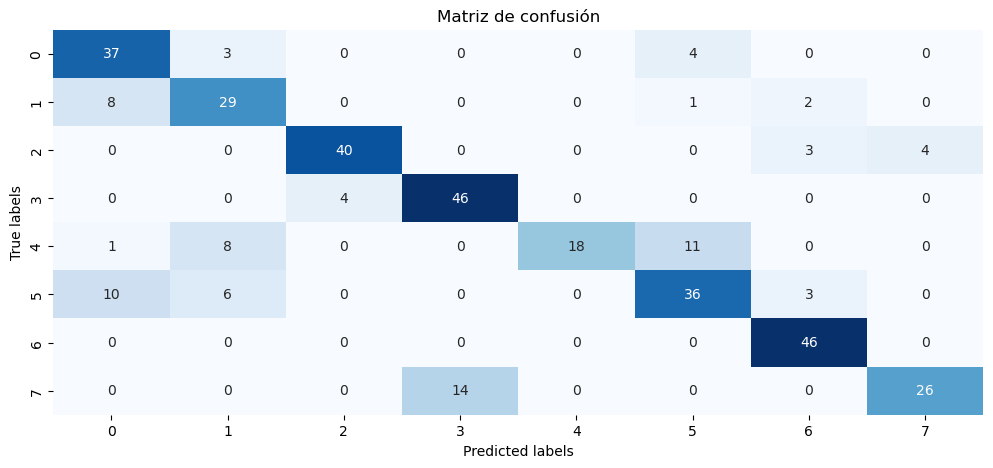

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74        44
           1       0.63      0.72      0.67        40
           2       0.91      0.85      0.88        47
           3       0.77      0.92      0.84        50
           4       1.00      0.47      0.64        38
           5       0.69      0.65      0.67        55
           6       0.85      1.00      0.92        46
           7       0.87      0.65      0.74        40

    accuracy                           0.77       360
   macro avg       0.80      0.76      0.76       360
weighted avg       0.79      0.77      0.77       360

Precisión en el conjunto de prueba: 77.22%


In [18]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123) 

# Predecimos las probabilidades de las clases del conjunto de prueba:
y_pred_probabilities = model_1.predict(X_test)

# Convertimos las probabilidades en clases (etiquetas):
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Calculamos la matriz de confusión:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Visualizamos la matriz de confusión
plt.figure(figsize = (12, 5))
sns.heatmap(confusion_mtx, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión')
plt.show()

# Mostramos el informe de clasificación
classification_report_str = classification_report(y_test, y_pred_classes)
print("Informe de clasificación:\n", classification_report_str)
# Calculamos y mostramos la precisión general en el conjunto de prueba:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

Con la matriz de confusión (tabla de clasificación errónea) y el informe de clasificación, obtenemos las métricas del modelo para el conjunto de prueba. El modelo 'model_1' tiene una precisión global del 77,22%, lo que significa que solo el 22,78% de las muestras del conjunto de pruebas han sido clasificadas incorrectamente.

En general, encontramos un buen ajuste y parámetros para el modelo 'model_1'. Para la mayoría de las clases, observamos buenos números que suelen estar por encima del 80% para precisión, recall y F1-score. Aunque algunas clases, como la clase 0, 1 y 5 tienen una precisión menor al 80%, y la clase 4 y 5 muestran un recall de 47% y 65%, respectivamente. Por último, la clase 0, 4, 5 y 7 tienen un valor de F1-score menor al 80%. En otras palabras, la clase 5 parece ser la que peor se ajusta al modelo en comparación con todas las demás.

Cabe destacar que para interpretar las clases debemos sumarles una unidad para obtener su valor o etiqueta real, según el enunciado de la PEC. La clase 5 de nuestro modelo hace referencia a la clase 6: 't-CS-m: trisómico-context-shock-memantina'.

# Definir el modelo 2, que consiste en una red neuronal con dos capas ocultas densas de 35 nodos y 15 nodos, con activación relu. Añadir un 20% de dropout en ambas capas. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa.

In [21]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
# Definimos el modelo de red neuronal como en el apartado 5, en este caso añadimos una capa adicional:
model_2 = models.Sequential()
model_2.add(layers.Dense(35, activation = 'relu', input_shape = (X_train.shape[1],)))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(15, activation = 'relu')) # Para este modelo se ha añadido otra capa densa de 15 nodos. 
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(8, activation = 'softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 35)                2555      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                540       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 128       
                                                                 
Total params: 3223 (12.59 KB)
Trainable params: 3223 (12.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Al igual que en el modelo anterior, el resumen del model_2 nos muestra 3223 parámetros en total, de los cuales 3223 son parámetros entrenables. Al justificar, como en el apartado anterior, obtenemos:

- Capa 'dense_2 (Dense)': 35 nodos de salida × 72 variables + 35 sesgos = 2555 parámetros.
- Capa 'dropout_1 (Dropout)': Sin parámetros entrenables.
- Capa 'dense_3 (Dense)', capa añadida para el model_2: 15 nodos de salida × 35 nodos de la capa anterior + 15 sesgos = 540 parámetros.
- Capa 'dropout_2 (Dropout)': Sin parámetros entrenables.
- Capa 'dense_4 (Dense)': 8 nodos de salida (clases) × 15 nodos anteriores +8 sesgos = 128 parámetros.

# Ajustar el modelo 2 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 50 épocas.

Epoch 1/50
18/18 - 3s - loss: 2.1101 - accuracy: 0.1285 - val_loss: 2.0761 - val_accuracy: 0.1111 - 3s/epoch - 156ms/step
Epoch 2/50
18/18 - 0s - loss: 2.0681 - accuracy: 0.1458 - val_loss: 2.0496 - val_accuracy: 0.1111 - 299ms/epoch - 17ms/step
Epoch 3/50
18/18 - 0s - loss: 2.0398 - accuracy: 0.1649 - val_loss: 2.0330 - val_accuracy: 0.1528 - 293ms/epoch - 16ms/step
Epoch 4/50
18/18 - 0s - loss: 2.0295 - accuracy: 0.1753 - val_loss: 2.0120 - val_accuracy: 0.1944 - 216ms/epoch - 12ms/step
Epoch 5/50
18/18 - 0s - loss: 2.0014 - accuracy: 0.2309 - val_loss: 1.9860 - val_accuracy: 0.2917 - 293ms/epoch - 16ms/step
Epoch 6/50
18/18 - 0s - loss: 1.9592 - accuracy: 0.2778 - val_loss: 1.9400 - val_accuracy: 0.3333 - 296ms/epoch - 16ms/step
Epoch 7/50
18/18 - 0s - loss: 1.9353 - accuracy: 0.2882 - val_loss: 1.8837 - val_accuracy: 0.4167 - 294ms/epoch - 16ms/step
Epoch 8/50
18/18 - 0s - loss: 1.8582 - accuracy: 0.3351 - val_loss: 1.8192 - val_accuracy: 0.4028 - 291ms/epoch - 16ms/step
Epoch 9/50

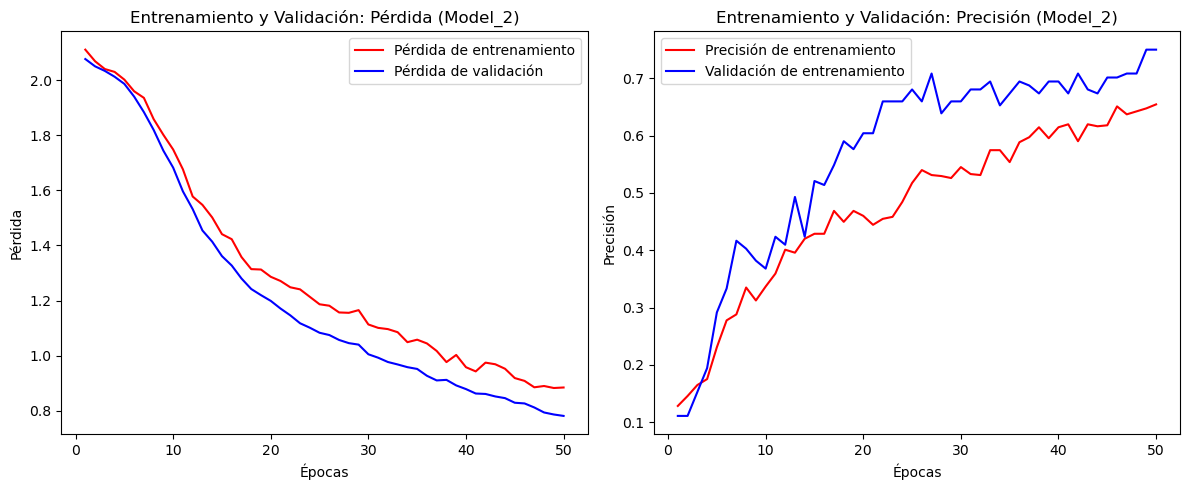

In [24]:
# Establecemos semillas para reproducibilidad
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

# Volvemos a realizar los pasos del apartado 6, en este caso usando el model_2:

# Compilamos el model_2:
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Entrenamos el model_2 y almacenamos la informacion en la variable "history_2": 
history_2 = model_2.fit(
    X_train, y_train,
    epochs = 50,
    validation_split = 0.2,
    verbose = 2
)

# Estraemos las métricas de 'history_2' para la visualizacion del modelo:
train_loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
train_acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']
epochs_2 = range(1, len(train_loss_2) + 1)

plt.figure(figsize = (12, 5))

# Gráfico pérdida:
plt.subplot(1, 2, 1)
plt.plot(epochs_2, train_loss_2, 'r', label = 'Pérdida de entrenamiento')
plt.plot(epochs_2, val_loss_2, 'b', label = 'Pérdida de validación')
plt.title('Entrenamiento y Validación: Pérdida (Model_2)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
# Gráfico precisión:
plt.subplot(1, 2, 2)
plt.plot(epochs_2, train_acc_2, 'r', label = 'Precisión de entrenamiento')
plt.plot(epochs_2, val_acc_2, 'b', label = 'Validación de entrenamiento')
plt.title('Entrenamiento y Validación: Precisión (Model_2)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Comparar en test, mediante las métricas de evaluación, los dos modelos.

In [26]:
# Métricas del modelo 1 en el conjunto de prueba:
eval_model_1 = model_1.evaluate(X_test, y_test)
loss_model_1, accuracy_model_1 = eval_model_1[0], eval_model_1[1]

# Métricas del modelo 2 en el conjunto de prueba:
eval_model_2 = model_2.evaluate(X_test, y_test)
loss_model_2, accuracy_model_2 = eval_model_2[0], eval_model_2[1]

# Imprimimos las métricas de evaluación
print("Métricas del Modelo 1 en el Conjunto de Prueba:")
print(f"Pérdida: {round(loss_model_1 * 100, 2)}%")
print(f"Precisión: {round(accuracy_model_1 * 100, 2)}%")

print("\nMétricas del Modelo 2 en el Conjunto de Prueba:")
print(f"Pérdida: {round(loss_model_2 * 100, 2)}%")
print(f"Precisión: {round(accuracy_model_2 * 100, 2)}%")

# Comparamos métricas adicionales:
y_pred_classes_1 = np.argmax(model_1.predict(X_test), axis=1)
y_pred_classes_2 = np.argmax(model_2.predict(X_test), axis=1)

# Matriz de confusión Model_1
confusion_mtx_1 = confusion_matrix(y_test, y_pred_classes_1)
print("\nMatriz de confusión del Modelo 1:")
print(confusion_mtx_1)
print("\nOtras métricas del Modelo 1:")
print(classification_report(y_test, y_pred_classes_1))

# Matriz de confusión Model_2
confusion_mtx_2 = confusion_matrix(y_test, y_pred_classes_2)
print("\nMatriz de confusión del Modelo 2:")
print(confusion_mtx_2)
print("\nOtras métricas del Modelo 2:")
print(classification_report(y_test, y_pred_classes_2))

12/12 [==============================] - 0s 8ms/step - loss: 0.7686 - accuracy: 0.7750
Métricas del Modelo 1 en el Conjunto de Prueba:
Pérdida: 85.37%
Precisión: 77.22%

Métricas del Modelo 2 en el Conjunto de Prueba:
Pérdida: 76.86%
Precisión: 77.5%
12/12 [==============================] - 0s 875us/step

Matriz de confusión del Modelo 1:
[[37  3  0  0  0  4  0  0]
 [ 8 29  0  0  0  1  2  0]
 [ 0  0 40  0  0  0  3  4]
 [ 0  0  4 46  0  0  0  0]
 [ 1  8  0  0 18 11  0  0]
 [10  6  0  0  0 36  3  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0 14  0  0  0 26]]

Otras métricas del Modelo 1:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        44
           1       0.63      0.72      0.67        40
           2       0.91      0.85      0.88        47
           3       0.77      0.92      0.84        50
           4       1.00      0.47      0.64        38
           5       0.69      0.65      0.67        55
           6       0.85      1.00

| Modelo | Pérdida (%) | Precisión (%) |
|--------|-------------|---------------|
| Model_1 | 85.37 | 77.22 | 
| Model_2 | 76.86 | 77.5 |

Ambos modelos presentan precisiones bastante similares en el conjunto de prueba, aunque se observa una diferencia la pérdida. La pérdida del Model_2 es menor, lo que indica que las predicciones del Model_2 están más cercanas a las etiquetas reales en comparación con el Model_1. Además, se pueden observar diferencias entre las clases de los modelos, ya que algunas clases muestran mejores métricas tanto en precisión como en recall. Por ejemplo, el Model_2 tiene un rendimiento mejor para las clases 2, 3, 6 y 7 en comparación con el Model_1.

En general, el Model_2, con una pérdida menor, parece ser una mejor opción al elegir un modelo. No obstante, es importante tener en cuenta las curvas de aprendizaje, donde el Model_1 parece indicar un mejor ajuste en comparación con el Model_2, especialmente en las gráficas de precisión de este último, lo que podría interpretarse como un posible sobreajuste.

En conclusión, ambos modelos son similares y escoger cualquiera de ellos parece ser una buena elección. Destacamos que el Model_2 es más complejo al tener una capa densa oculta adicional. Para asegurarnos de la elección del modelo, se deberían explorar otros factores como la complejidad del modelo, el tiempo de entrenamiento y la capacidad de generalización a futuros conjuntos de datos.